In [1]:
import numpy as np
import sys
import argparse
sys.path.append('/global/homes/l/lonappan/workspace/cobi')
from cobi import mpi
from cobi.simulation import LATsky
from cobi.spectra import Spectra
from cobi.mle import MLE

In [2]:
libdir = '/global/cfs/cdirs/sobs/cosmic_birefringence/v0'
nside = 2048
cb_model = "iso"
beta = 0.35
fit = "Ad + beta + alpha"
binwidth = 10
bmin = 50
bmax = 2000

In [3]:
settings_dict = {
    "setting1": {
        "alpha": 0,
        "alpha_err": 0,
        "bp": False,
        "nm": "NC"
    },
    "setting2": {
        "alpha": 0,
        "alpha_err": 0.1,
        "bp": False,
        "nm": "NC"
    },
    "setting3": {
        "alpha": [-0.1, -0.1, 0.2, 0.2, .15, .15],
        "alpha_err": 0.1,
        "bp": False,
        "nm": "NC"
    },
    "setting4": {
        "alpha": [-0.1, -0.1, 0.2, 0.2, .15, .15],
        "alpha_err": 0.1,
        "bp": True,
        "nm": "NC"
    },
    "setting5": {
        "alpha": [-0.1, -0.1, 0.2, 0.2, .15, .15],
        "alpha_err": 0.1,
        "bp": True,
        "nm": "TOD"
    }
}



In [4]:
data = {}
stuffs = ['beta','27', '39', '93', '145', '225', '280']
for name, params in settings_dict.items():
    print(f"Running {name} with parameters: {params}")
    lat = LATsky(libdir, nside, cb_model, beta,
                 alpha=params["alpha"],
                 alpha_err=params["alpha_err"],
                 bandpass=params["bp"],
                 noise_model=params["nm"])
    spec = Spectra(lat, libdir, cache=True, parallel=0)
    mle = MLE(libdir,spec,fit, alpha_per_split=False,rm_same_tube=True,binwidth=binwidth,bmin=bmin,bmax=bmax)
    data[name] = {}
    for stuff in stuffs:
        data[name][stuff] = np.zeros(100)
    for i in range(100):
        result = mle.estimate_angles(i)
        for stuff in stuffs:
            data[name][stuff][i] = result[stuff]

CMB : INFO - Loading CMB power spectra from file


CMB : INFO - Isotropic(constant) cosmic birefringence model selected


Running setting1 with parameters: {'alpha': 0, 'alpha_err': 0, 'bp': False, 'nm': 'NC'}


Mask : INFO - Upgrading mask LAT resolution
Noise : INFO - Noise Model:[LAT] White + 1/f noise v3.1.1
Spectra : INFO - Reading apodised mask from /global/cfs/cdirs/sobs/cosmic_birefringence/v0/spectra_2048_aposcale2p0/workspaces/mask_N2048_aposcale2p0_CO_PS.fits
Spectra : INFO - Reading coupling Matrix from /global/cfs/cdirs/sobs/cosmic_birefringence/v0/spectra_2048_aposcale2p0/workspaces/coupling_matrix_N2048_fsky0p55_aposcale2p0_bw1_CO_PS.fits
Spectra : INFO - No parallelization
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected


Fitting a common polarisation angle per frequency
Don't use cross-spectra of bands within the same optical tube
Running setting2 with parameters: {'alpha': 0, 'alpha_err': 0.1, 'bp': False, 'nm': 'NC'}


Mask : INFO - Upgrading mask LAT resolution
Noise : INFO - Noise Model:[LAT] White + 1/f noise v3.1.1
Spectra : INFO - Reading apodised mask from /global/cfs/cdirs/sobs/cosmic_birefringence/v0/spectra_2048_aposcale2p0/workspaces/mask_N2048_aposcale2p0_CO_PS.fits
Spectra : INFO - Reading coupling Matrix from /global/cfs/cdirs/sobs/cosmic_birefringence/v0/spectra_2048_aposcale2p0/workspaces/coupling_matrix_N2048_fsky0p55_aposcale2p0_bw1_CO_PS.fits
Spectra : INFO - No parallelization
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected


Fitting a common polarisation angle per frequency
Don't use cross-spectra of bands within the same optical tube
Running setting3 with parameters: {'alpha': [-0.1, -0.1, 0.2, 0.2, 0.15, 0.15], 'alpha_err': 0.1, 'bp': False, 'nm': 'NC'}


Mask : INFO - Upgrading mask LAT resolution
Noise : INFO - Noise Model:[LAT] White + 1/f noise v3.1.1
Spectra : INFO - Reading apodised mask from /global/cfs/cdirs/sobs/cosmic_birefringence/v0/spectra_2048_aposcale2p0/workspaces/mask_N2048_aposcale2p0_CO_PS.fits
Spectra : INFO - Reading coupling Matrix from /global/cfs/cdirs/sobs/cosmic_birefringence/v0/spectra_2048_aposcale2p0/workspaces/coupling_matrix_N2048_fsky0p55_aposcale2p0_bw1_CO_PS.fits
Spectra : INFO - No parallelization
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected


Fitting a common polarisation angle per frequency
Don't use cross-spectra of bands within the same optical tube
Running setting4 with parameters: {'alpha': [-0.1, -0.1, 0.2, 0.2, 0.15, 0.15], 'alpha_err': 0.1, 'bp': True, 'nm': 'NC'}


Mask : INFO - Upgrading mask LAT resolution
Noise : INFO - Noise Model:[LAT] White + 1/f noise v3.1.1
Spectra : INFO - Reading apodised mask from /global/cfs/cdirs/sobs/cosmic_birefringence/v0/spectra_2048_aposcale2p0/workspaces/mask_N2048_aposcale2p0_CO_PS.fits
Spectra : INFO - Reading coupling Matrix from /global/cfs/cdirs/sobs/cosmic_birefringence/v0/spectra_2048_aposcale2p0/workspaces/coupling_matrix_N2048_fsky0p55_aposcale2p0_bw1_CO_PS.fits
Spectra : INFO - No parallelization
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
Mask : INFO - Upgrading mask LAT resolution


Fitting a common polarisation angle per frequency
Don't use cross-spectra of bands within the same optical tube
Running setting5 with parameters: {'alpha': [-0.1, -0.1, 0.2, 0.2, 0.15, 0.15], 'alpha_err': 0.1, 'bp': True, 'nm': 'TOD'}


Noise : INFO - Noise Model: [LAT] Based on TOD and Map based simulations, directly using SO products.
Spectra : INFO - Reading apodised mask from /global/cfs/cdirs/sobs/cosmic_birefringence/v0/spectra_2048_aposcale2p0/workspaces/mask_N2048_aposcale2p0_CO_PS.fits
Spectra : INFO - Reading coupling Matrix from /global/cfs/cdirs/sobs/cosmic_birefringence/v0/spectra_2048_aposcale2p0/workspaces/coupling_matrix_N2048_fsky0p55_aposcale2p0_bw1_CO_PS.fits
Spectra : INFO - No parallelization
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected


Fitting a common polarisation angle per frequency
Don't use cross-spectra of bands within the same optical tube


In [5]:
data

{'setting1': {'beta': array([0.41800601, 0.2491491 , 0.18884121, 0.30594407, 0.37919146,
         0.35281452, 0.3329454 , 0.40739023, 0.40880238, 0.3953659 ,
         0.36357609, 0.46682158, 0.35290649, 0.21600454, 0.20062976,
         0.15156789, 0.24315663, 0.26302508, 0.29816709, 0.31334866,
         0.35331558, 0.3572948 , 0.38841451, 0.4120878 , 0.38814703,
         0.26757482, 0.43463669, 0.27755222, 0.32586473, 0.2990087 ,
         0.29993123, 0.28006486, 0.24048212, 0.38964943, 0.22752403,
         0.29358474, 0.51668018, 0.29626274, 0.30597523, 0.1989564 ,
         0.32954935, 0.32894002, 0.37227556, 0.38785383, 0.50626842,
         0.46304618, 0.31391817, 0.44243863, 0.35444158, 0.3636677 ,
         0.40522731, 0.33146926, 0.22646033, 0.23888082, 0.35531077,
         0.24822685, 0.16133629, 0.39975227, 0.41577706, 0.35267298,
         0.33095754, 0.43879152, 0.2612489 , 0.34941988, 0.32465406,
         0.45280827, 0.4494018 , 0.40492077, 0.39477276, 0.3184059 ,
         0.255

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not

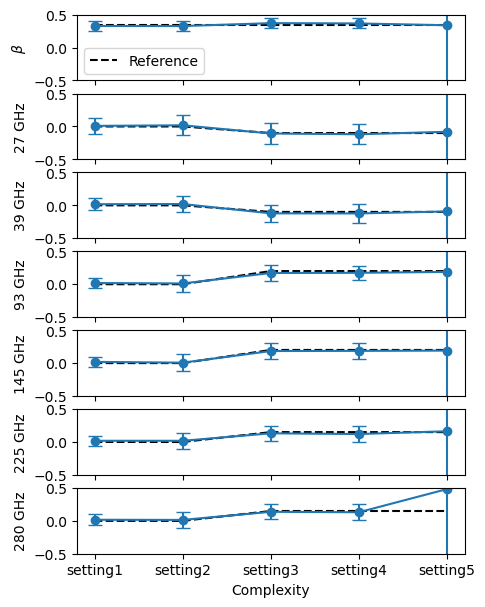

In [6]:
import matplotlib.pyplot as plt

# Reference values for each setting
reference_dict = {
    "setting1": [0.35, 0, 0, 0, 0, 0, 0],
    "setting2": [0.35, 0, 0, 0, 0, 0, 0],
    "setting3": [0.35, -0.1, -0.1, 0.2, 0.2, .15, .15],
    "setting4": [0.35, -0.1, -0.1, 0.2, 0.2, .15, .15],
    "setting5": [0.35, -0.1, -0.1, 0.2, 0.2, .15, .15],
}

# Prepare data for plotting
settings = list(data.keys())
stuffs = ['beta','27', '39', '93', '145', '225', '280']
means = {stuff: [data[setting][stuff].mean() for setting in settings] for stuff in stuffs}
stds = {stuff: [data[setting][stuff].std() for setting in settings] for stuff in stuffs}

fig, axes = plt.subplots(len(stuffs), 1, figsize=(5, 1*len(stuffs)), sharex=True)

for idx, stuff in enumerate(stuffs):
    ax = axes[idx]
    ax.errorbar(settings, means[stuff], yerr=stds[stuff], fmt='o-', capsize=5)
    # Plot reference values as dashed line
    ref_vals = [reference_dict[setting][idx] for setting in settings]
    if stuff == 'beta':
        ax.plot(settings, ref_vals, 'k--', label='Reference')
        ax.set_ylabel(f"$\\beta$")
        ax.legend()
    else:
        ax.plot(settings, ref_vals, 'k--')
        ax.set_ylabel(f"{stuff} GHz") 
    ax.set_ylim([-0.5, 0.5])
axes[-1].set_xlabel('Complexity')
   
plt.savefig('mle_results.pdf', dpi=300, bbox_inches='tight')